In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
print(dataset)

     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    100  1213 

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x= sc.fit_transform(x)

In [5]:
print(x)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [6]:
from minisom import MiniSom
som=MiniSom(10,10,input_len=15,sigma=1,learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

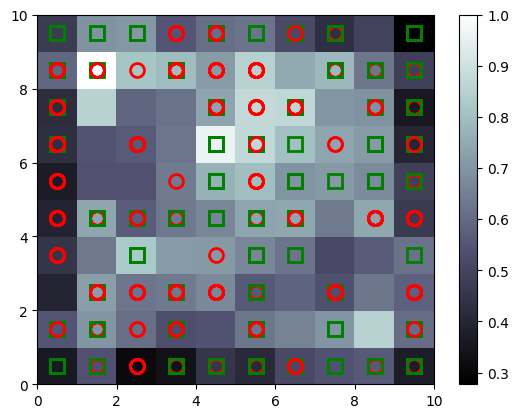

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,j in enumerate(x) :
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [11]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(1,8)]), axis = 0)
frauds = sc.inverse_transform(x)

In [12]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15776156
15739548
15662854
15687688
15715750
15571121
15726466
15660390
15663942
15638610
15644446
15585892
15609356
15803378
15599440
15692408
15683168
15790254
15767729
15768600
15699839
15786237
15694530
15796813
15605791
15714087
15711446
15588123
15748552
15618410
15672432
15610042
15580914
15583680
15813718
15767264
15686461
15678882
15789611
15668679
15631685
15655658
15753591
15617348
15704581
15738487
15648069
15737627
15731586
15757467
15597709
15720529
15596797
15681755
15815271
15682860
15621546
15705918
15684512
15671769
15642934
15594305
15789201
15706762
15766183
15777994
15568162
15680643
15761854
15730793
15692137
15608595
15709459
15775750
15585855
15752139
15768295
15766906
15725776
15682576
15704081
15719940
15672894
15667451
15636767
15571415
15575605
15649160
15615832
15600975
15690772
15565714
15763108
15723884
15644453
15655464
15783883
15787693
15664793
15642391
15756538
15668830
15796569
15677112
15815040
15590434
15597536
15723989
15767358


In [10]:
print(len(frauds))

690
